### More plotting with `matplotlib` and `seaborn`

Today we continue to work with `matplotlib`, focusing on customization and using subplots.  Also, the `seaborn` library will be introduced as a second visualization library with additional functionality for plotting data.

In [ ]:
#!pip install -U seaborn

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### `3D Plotting`

There are additional projections available including polar and three dimensional projections.  These can be accessed through the `projection` argument in the `axes` functions.

- [3d plotting](https://matplotlib.org/stable/gallery/mplot3d/index.html)

In [2]:
def f(x, y):
    return x**2 - y**2
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

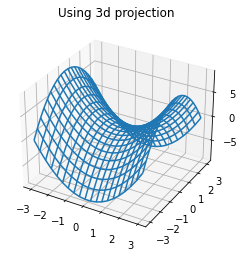

In [4]:
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, f(X, Y))
ax.set_title('Using 3d projection');

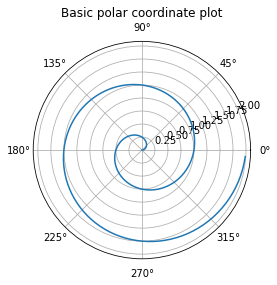

In [5]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
ax = plt.axes(projection = 'polar')
ax.plot(theta, r)
ax.set_title('Basic polar coordinate plot');

### `Gridspec`

If you want to change the layout and organization of the subplot the `Gridspec` object allows you to specify additional information about width and height ratios of the subplots.  Examples below are from the documentation [here](https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#gridspec-demo).

In [6]:
from matplotlib.gridspec import GridSpec

In [7]:
#helper for annotating
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

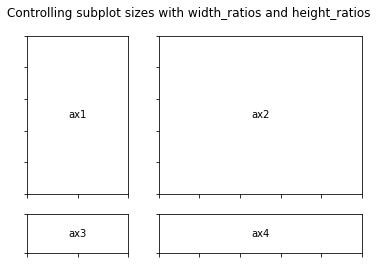

In [8]:
fig = plt.figure()
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios")

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

annotate_axes(fig)

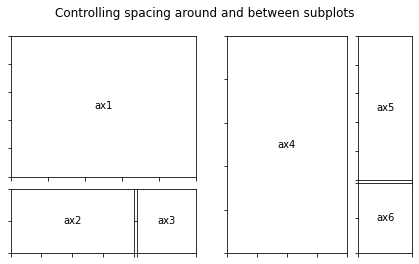

In [9]:
fig = plt.figure()
fig.suptitle("Controlling spacing around and between subplots")

gs1 = GridSpec(3, 3, left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

gs2 = GridSpec(3, 3, left=0.55, right=0.98, hspace=0.05)
ax4 = fig.add_subplot(gs2[:, :-1])
ax5 = fig.add_subplot(gs2[:-1, -1])
ax6 = fig.add_subplot(gs2[-1, -1])

annotate_axes(fig)

plt.show()

#### Exercise

Use `GridSpec` to write a function that takes in a column from a `DataFrame` (a `Series` object) and returns a 2 row 1 column plot where the bottom plot is a histogram and top is boxplot; similar to image below.




![](images/example_histbox.png)

#### Introduction to `seaborn`

The `seaborn` library is built on top of `matplotlib` and offers high level visualization tools for plotting data.  Typically a call to the `seaborn` library looks like:

```
sns.plottype(data = DataFrame, x = x, y = y, additional arguments...)
```

In [11]:
### load a sample dataset on tips
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


<AxesSubplot: xlabel='tip'>

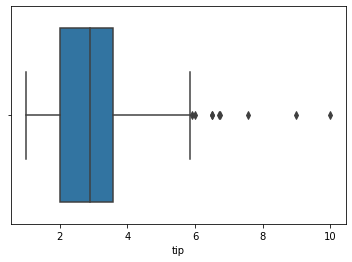

In [12]:
### boxplot of tips
sns.boxplot(data = tips, x = 'tip')

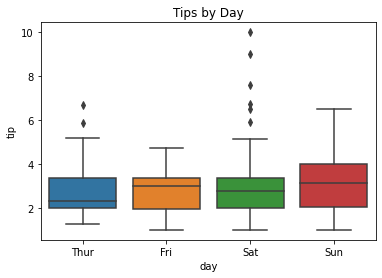

In [13]:
### boxplot of tips by day
sns.boxplot(data = tips, x = 'day', y = 'tip')
plt.title('Tips by Day');

#### `hue`

The `hue` argument works like a grouping helper with `seaborn`.  Plots that have this argument will break the data into groups from the passed column and add an appropriate legend.

<AxesSubplot: xlabel='day', ylabel='tip'>

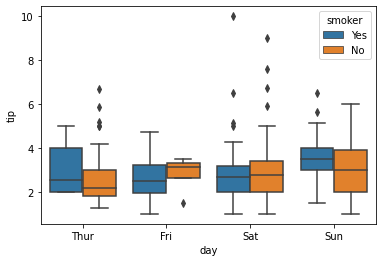

In [15]:
### boxplot of tips by day by smoker
sns.boxplot(data = tips, x = 'day', y = 'tip', hue = 'smoker')

#### `displot`

For visualizing one dimensional distributions of data.

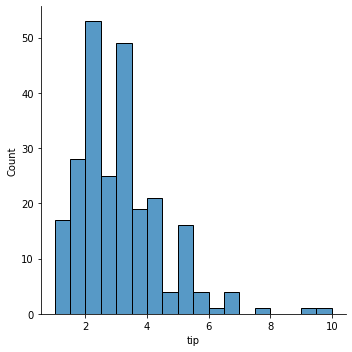

In [16]:
### histogram of tips
sns.displot(data = tips, x = 'tip')

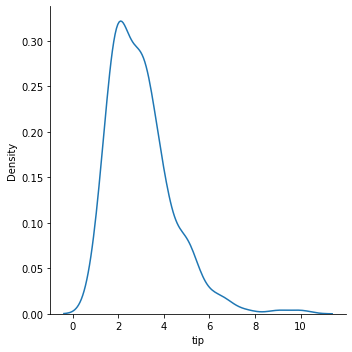

In [17]:
### kde plot
sns.displot(data = tips, x = 'tip', kind = 'kde')

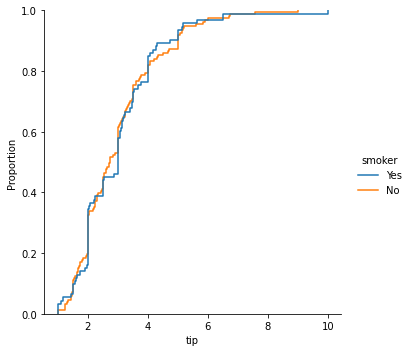

In [18]:
### empirical cumulative distribution plot of tips by smoker
sns.displot(data = tips, x = 'tip', kind = 'ecdf', hue = 'smoker')

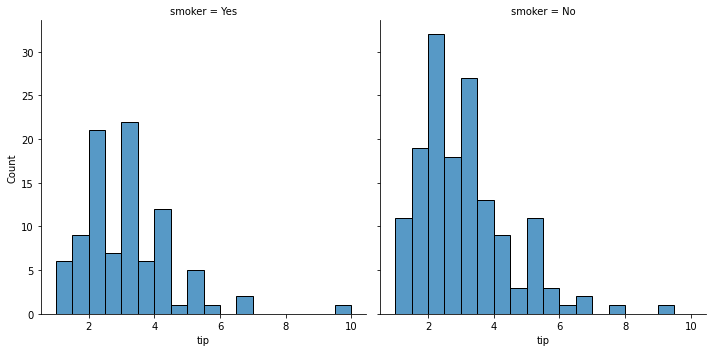

In [19]:
### using the col argument
sns.displot(data = tips, x = 'tip', col = 'smoker')

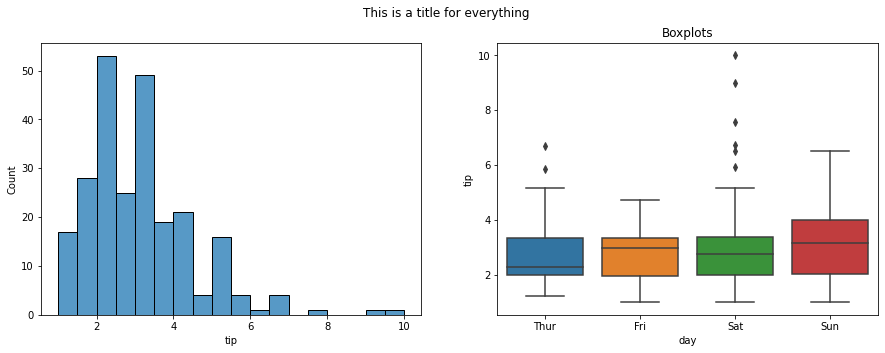

In [20]:
#draw a histogram and a boxplot using seaborn on two axes
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(data = tips, x = 'tip', ax = ax[0])
sns.boxplot(data = tips, x = 'day', y = 'tip', ax = ax[1])
ax[1].set_title('Boxplots')
fig.suptitle('This is a title for everything');

#### `relplot`

For visualizing relationships.

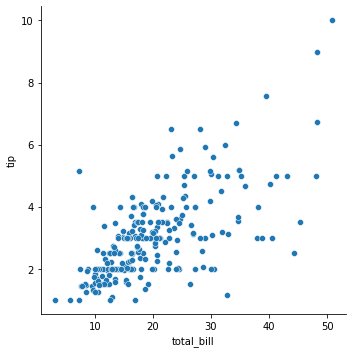

In [21]:
### relplot of bill vs. tip
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

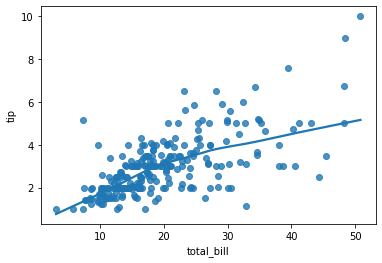

In [23]:
### regression plot
sns.regplot(data = tips, x ='total_bill', y = 'tip', lowess = True )

<AxesSubplot: xlabel='smoker', ylabel='tip'>

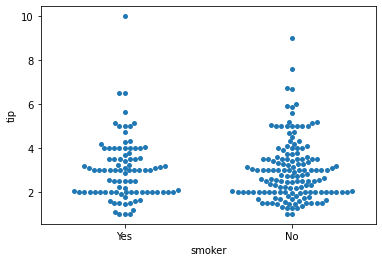

In [24]:
### swarm
sns.swarmplot(data = tips, x = 'smoker', y = 'tip')

<AxesSubplot: xlabel='smoker', ylabel='tip'>

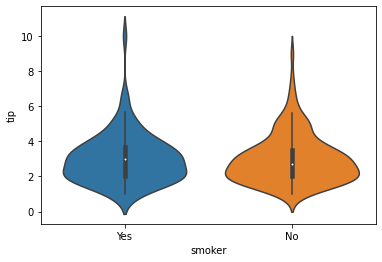

In [25]:
### violin plot
sns.violinplot(data = tips, x = 'smoker', y = 'tip')

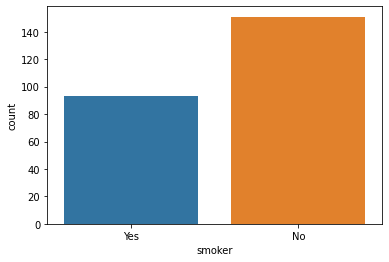

In [26]:
### countplot
sns.countplot(data = tips, x = 'smoker');

1. Create a histogram of flipper length by species.  

In [27]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


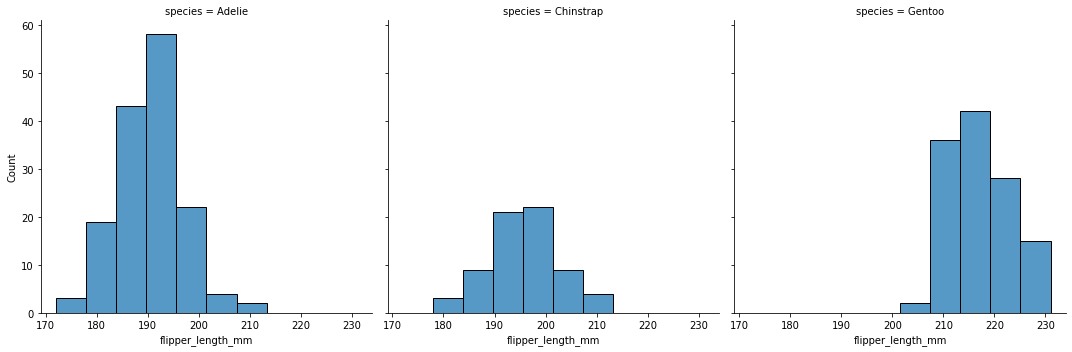

In [30]:
sns.displot(data = penguins, x = 'flipper_length_mm', col = 'species')

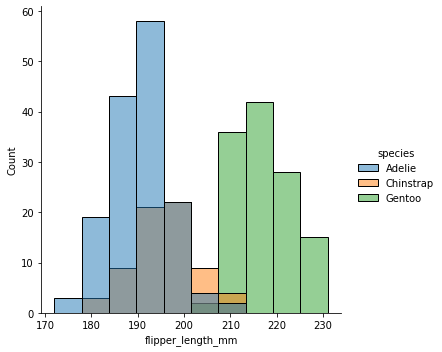

In [31]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species')

2. Create a scatterplot of bill length vs. flipper length.

<AxesSubplot: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

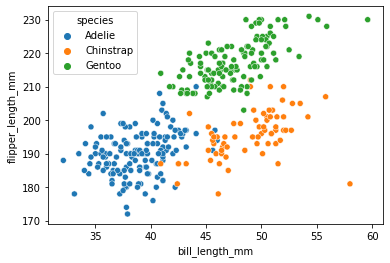

In [33]:
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm', hue = 'species')

3. Create a violin plot of each species mass split by sex.

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

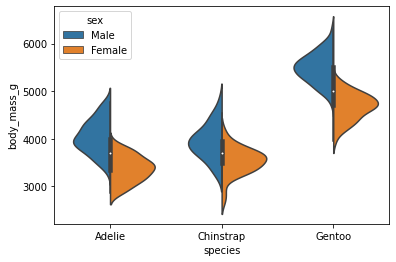

In [39]:
sns.violinplot(data = penguins, x = 'species', y = 'body_mass_g', hue = 'sex', split = True)

#### Additional Plots

- `pairplot`
- `heatmap`

In [40]:
penguins = sns.load_dataset('penguins').dropna()

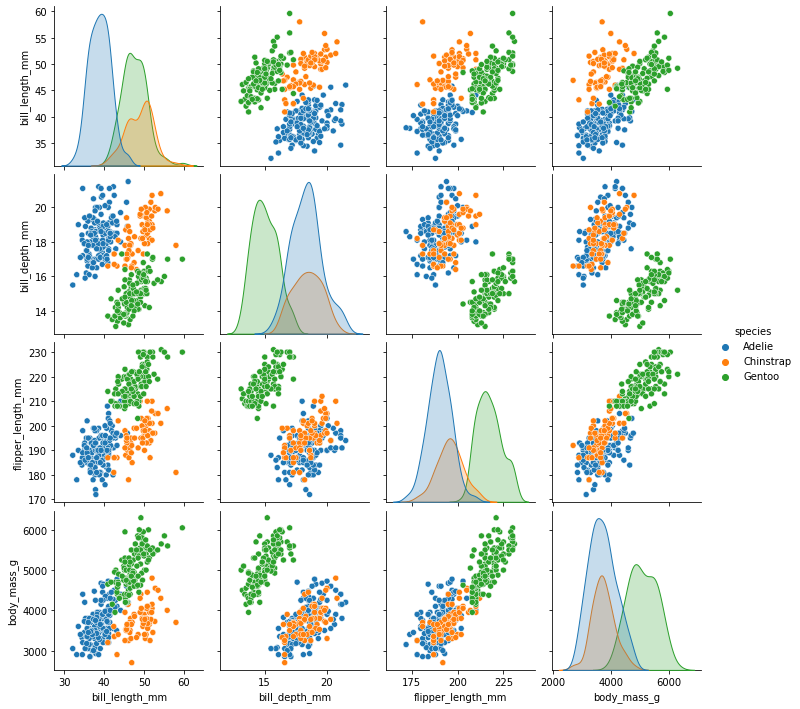

In [41]:
### pairplot of penguins colored by species
sns.pairplot(data = penguins, hue = 'species')

In [42]:
### housing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame = True).frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Plotting Correlations

Correlation captures the strength of a linear relationship between features.  Often, this is easier to look at than a scatterplot of the data to establish relationships, however recall that this is only a detector for *linear* relationships!

In [44]:
### correlation in data
housing.corr(numeric_only = True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

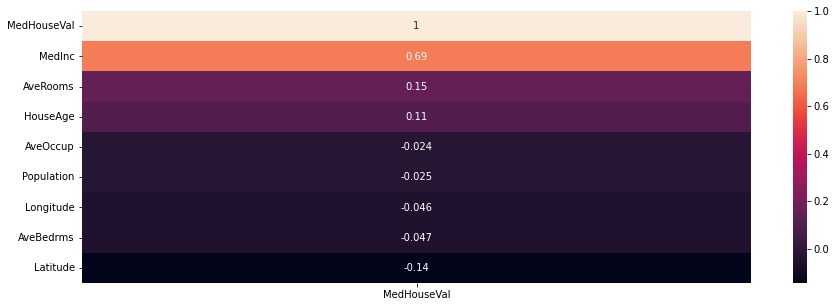

In [48]:
### heatmap of correlations
plt.figure(figsize = (15, 5))
sns.heatmap(housing.corr()[['MedHouseVal']].sort_values(by = 'MedHouseVal', ascending = False), annot = True)

#### Problems

Use the `diabetes` data below loaded from OpenML ([docs](https://www.openml.org/search?type=data&sort=runs&status=active&id=37)).  

In [49]:
from sklearn.datasets import fetch_openml

In [50]:
diabetes = fetch_openml(data_id = 37).frame

In [51]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


1. Distribution of ages separated by class.

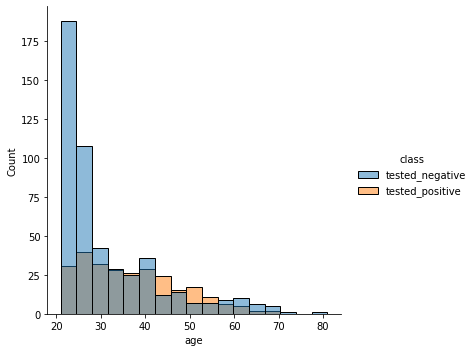

In [54]:
sns.displot(diabetes, x = 'age', hue = 'class')

2. Heatmap of features.  Any strong correlations?

<ipython-input-58-7c98d612fac1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes.corr(), annot = True, cmap = 'BuPu')


<AxesSubplot: >

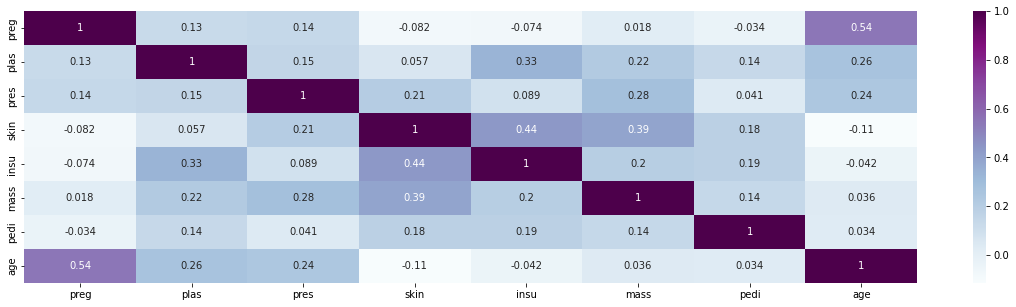

In [58]:
plt.figure(figsize = (20, 5))
sns.heatmap(diabetes.corr(), annot = True, cmap = 'BuPu')

3. **CHALLENGE**: 2 rows and 4 columns with histograms separated by class column.  Which feature has the most distinct difference between classes?

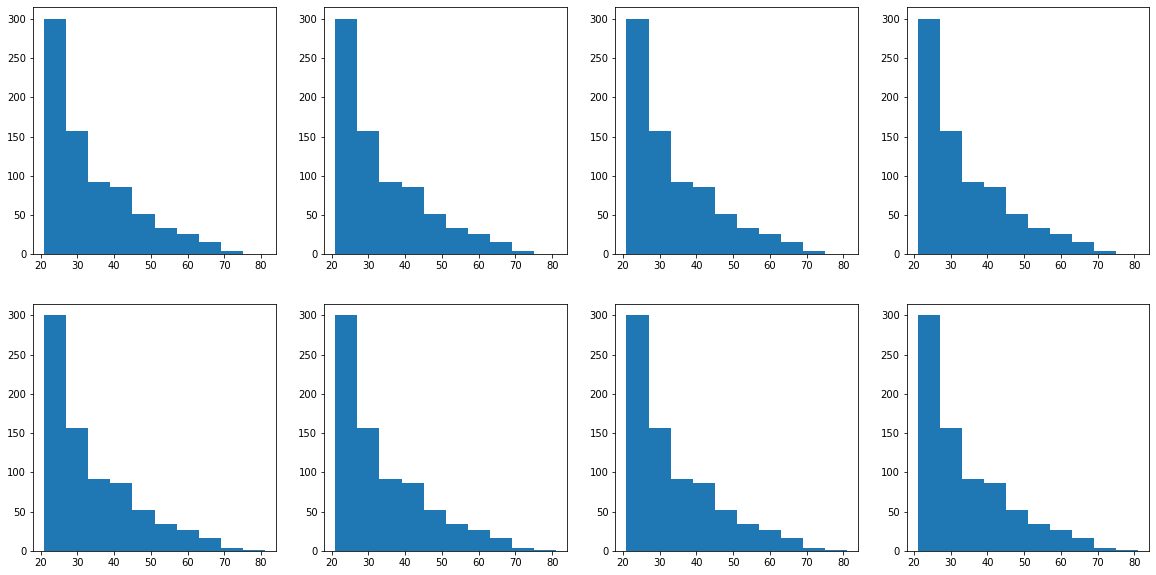

In [59]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
for row in range(2):
    for col in range(4):
        ax[row, col].hist(diabetes['age'])

### 

#### Review



In [ ]:
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

**EXERCISE**

- Set 'Food' as the index of cals.
- Create a bar chart with calories.
- Add a title.
- Change the color of the bars.  
- Add the argument alpha=0.5.  What does it do?
- Change your chart to a horizontal bar chart.  Which do you prefer?